In [207]:
%matplotlib inline
import matplotlib.pyplot as plt


### How to print nice confusion matrices.

In [208]:
# load data
from sklearn.datasets import load_breast_cancer

breastData = load_breast_cancer()

In [209]:
breastData.target_names

array(['malignant', 'benign'], dtype='<U9')

In [210]:
breastData.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [211]:
from sklearn.model_selection import train_test_split
# separate data
# Import train_test_split function
X_wine = breastData.data
y_wine = breastData.target

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3, train_size=0.7, random_state=987, shuffle=True)

In [212]:
from sklearn.tree import DecisionTreeClassifier

#create and fit model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        58
           1       0.94      0.96      0.95       113

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



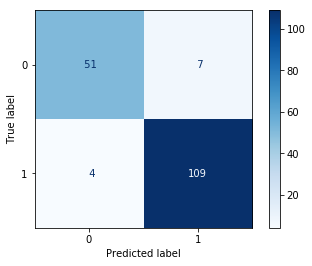

In [213]:
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, values_format="3.0f")

### Function for the visualization of a decision tree

If you use the conda package manager, the graphviz binaries and the python package can be installed with

`conda install python-graphviz`
Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with `pip install graphviz`.

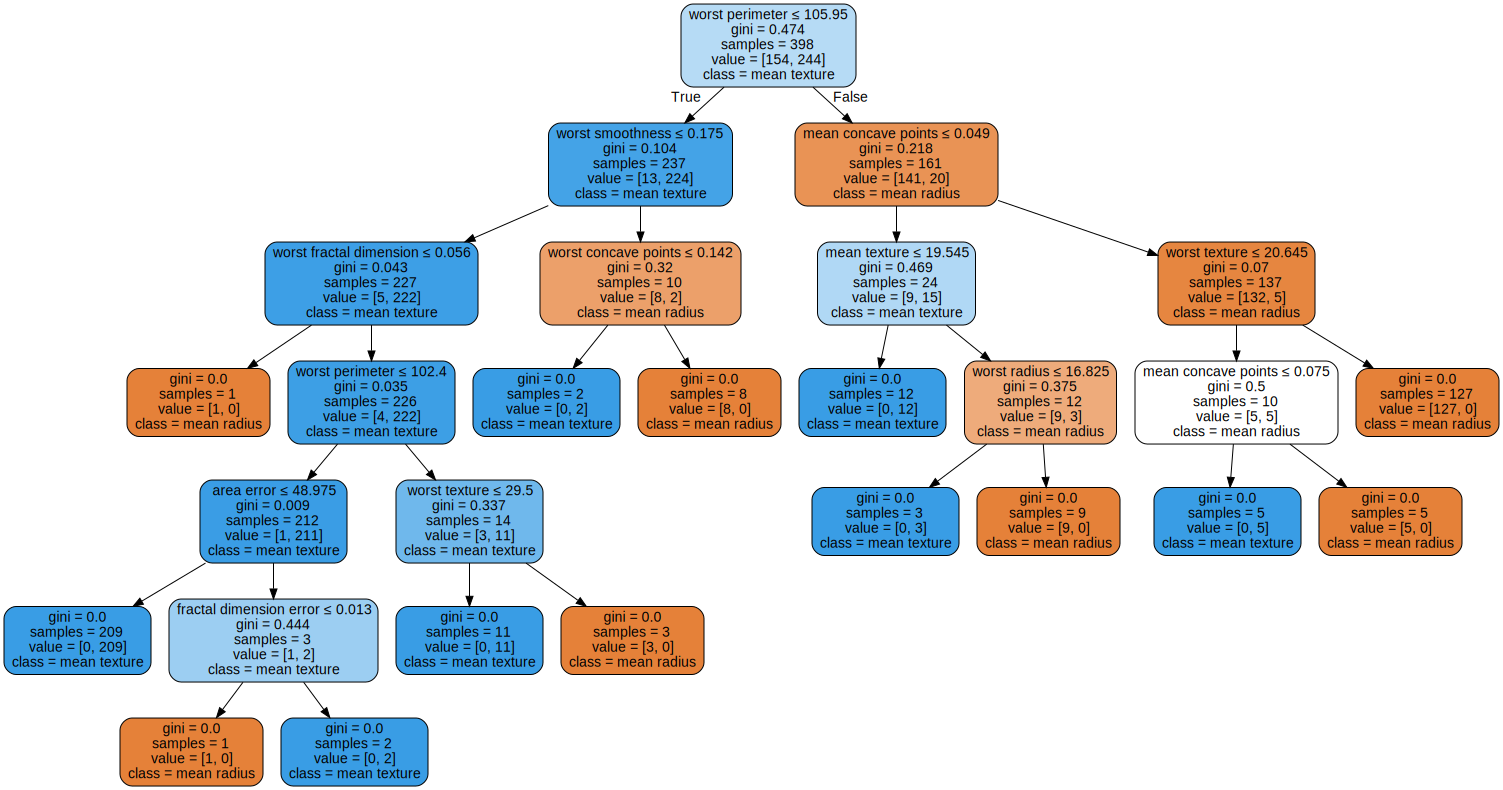

In [214]:
import graphviz
from sklearn import tree
def show_decision_tree(clf, data_feature_names, data_target_names, name=""):
    """This function visualize a decision tree"""
    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data)
    graph.render(name) 
    dot_data = tree.export_graphviz(clf,                                    
                                    out_file=None,  
                                    filled=True,
                                    feature_names=data_feature_names,  
                                    class_names=data_target_names,
                                    rounded=True,  
                                    special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

show_decision_tree(model, breastData.feature_names, breastData.feature_names, "./graph")

In [215]:
#Now with gridsearch
from sklearn.model_selection import GridSearchCV
import numpy as np
#Now play with parameters
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(2,10),
    'min_samples_leaf': range(1,10),
    'random_state' : range(0,100,10)
}

#gridsearch classifier
clf = DecisionTreeClassifier()
gs_clf = GridSearchCV(clf, parameters, verbose=1, cv=5, n_jobs=-1)
gs_clf.fit(X_train, y_train)

#Fetch best AI
bestModel = gs_clf.best_estimator_

gs_clf.best_score_
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits
criterion: 'entropy'
max_depth: 5
min_samples_leaf: 1
min_samples_split: 2
random_state: 10


              precision    recall  f1-score   support

           0       0.91      0.88      0.89        58
           1       0.94      0.96      0.95       113

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



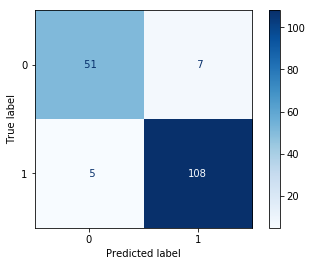

In [216]:
#Print gridsearch final accuracy
y_pred = bestModel.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(bestModel, X_test, y_test, cmap=plt.cm.Blues, values_format="3.0f")

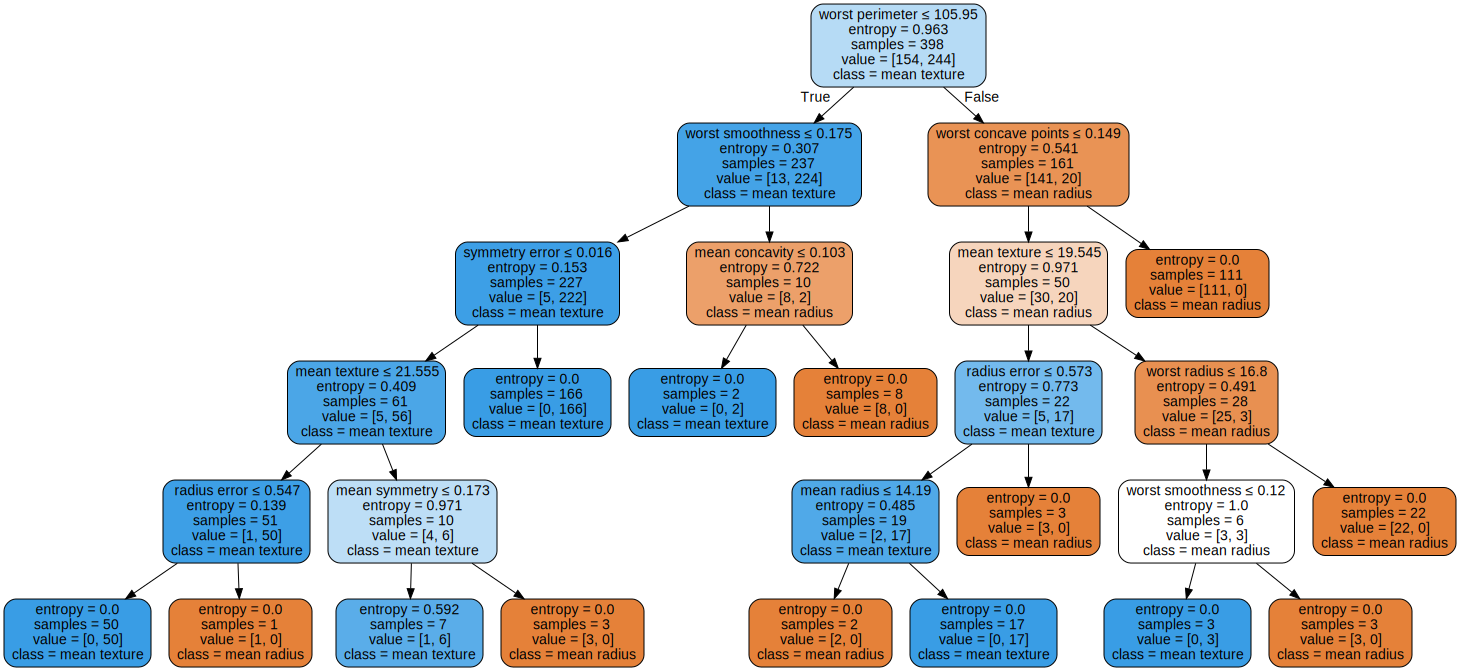

In [217]:
import graphviz
from sklearn import tree
def show_decision_tree(clf, data_feature_names, data_target_names, name=""):
    """This function visualize a decision tree"""
    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data)
    graph.render(name) 
    dot_data = tree.export_graphviz(clf,                                    
                                    out_file=None,  
                                    filled=True,
                                    feature_names=data_feature_names,  
                                    class_names=data_target_names,
                                    rounded=True,  
                                    special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

show_decision_tree(bestModel, breastData.feature_names, breastData.feature_names, "./graph")

In [218]:
#Visualize data
print(breastData.feature_names)
print(breastData.target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

In [226]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#SVM + pipeline with normalization
# THE NORMALIZATION IS USELESS AS DATA c [0,1] but i do it anyway to test it :-(
# I just wanted to create a pipeline with a transform to see if i can make it work but the data is not adatped for a normalization
pipeline_transform_SVM = Pipeline([
    ('tf', Normalizer()),
    ('clf', SVC()),
])
pipeline_transform_SVM.fit(X_train, y_train)

# Gridsearch
parameters = {
    'tf__norm': ["l1", "l2", "max"],
    'clf__kernel':["linear", "poly", "rbf", "sigmoid"],
    'clf__degree' : range(1,6),
    'clf__gamma' : ["auto", "scale"],
}
gridSearch = GridSearchCV(pipeline_transform_SVM, parameters, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', Normalizer()), ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__degree': range(1, 6),
                         'clf__gamma': ['auto', 'scale'],
                         'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tf__norm': ['l1', 'l2', 'max']})

In [223]:
#best estimator
best_model = gridSearch.best_estimator_

gridSearch.best_score_
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gridSearch.best_params_[param_name]))

clf__degree: 5
clf__gamma: 'scale'
clf__kernel: 'poly'
tf__norm: 'max'


              precision    recall  f1-score   support

           0       0.91      0.84      0.88        58
           1       0.92      0.96      0.94       113

    accuracy                           0.92       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



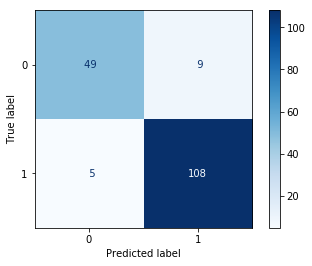

In [224]:
#Print results
#Print gridsearch final accuracy
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues, values_format="3.0f")